In [55]:
import os

train_dir      = os.path.join('data', 'train')
validation_dir = os.path.join('data', 'validation')

In [56]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

batch_size=20

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 400x400
        target_size=(200, 200),
        batch_size=batch_size,
        class_mode="categorical")

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(200, 200),
        batch_size=batch_size,
        class_mode="categorical")

Found 18424 images belonging to 10 classes.
Found 4000 images belonging to 10 classes.


In [58]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Reshape((200 * 200 *3,), input_shape=(200,200,3)))
network.add(layers.Dense(256, activation='relu', name='Layer_1', input_shape=(200 * 200 *3,)))
network.add(layers.Dense(128, activation='relu', name='Layer_3'))
network.add(layers.Dense(64, activation='relu', name='Layer_4'))

network.add(layers.Dense(10, activation='softmax'))

network.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_3 (Reshape)         (None, 120000)            0         
                                                                 
 Layer_1 (Dense)             (None, 256)               30720256  
                                                                 
 Layer_3 (Dense)             (None, 128)               32896     
                                                                 
 Layer_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_12 (Dense)            (None, 10)                650       
                                                                 
Total params: 30,762,058
Trainable params: 30,762,058
Non-trainable params: 0
_________________________________________________________________


In [59]:
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import optimizers

network.compile(optimizer=optimizers.Adam(),
              loss=losses.categorical_crossentropy,
              metrics=['accuracy'])

In [60]:
history = network.fit(
      train_generator,
      steps_per_epoch=18424//batch_size,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=4000//batch_size
      )

Epoch 1/20
921/921 [==============================] - 142s 153ms/step - loss: 1.7317 - accuracy: 0.6229 - val_loss: 0.4171 - val_accuracy: 0.8805
Epoch 2/20
921/921 [==============================] - 91s 99ms/step - loss: 0.3802 - accuracy: 0.8804 - val_loss: 0.2384 - val_accuracy: 0.9333
Epoch 3/20
921/921 [==============================] - 90s 98ms/step - loss: 0.3230 - accuracy: 0.9006 - val_loss: 0.2126 - val_accuracy: 0.9383
Epoch 4/20
921/921 [==============================] - 93s 101ms/step - loss: 0.2061 - accuracy: 0.9320 - val_loss: 0.5502 - val_accuracy: 0.8378
Epoch 5/20
921/921 [==============================] - 94s 102ms/step - loss: 0.2302 - accuracy: 0.9309 - val_loss: 0.1366 - val_accuracy: 0.9603
Epoch 6/20
921/921 [==============================] - 92s 100ms/step - loss: 0.1652 - accuracy: 0.9456 - val_loss: 0.2016 - val_accuracy: 0.9417
Epoch 7/20
921/921 [==============================] - 102s 111ms/step - loss: 0.1694 - accuracy: 0.9450 - val_loss: 0.1273 - val_ac

In [61]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

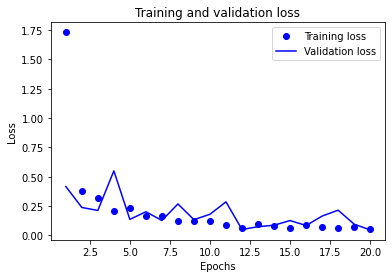

In [64]:
import matplotlib.pyplot as plt 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

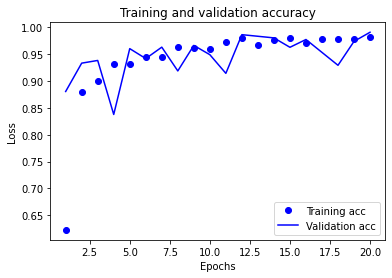

In [65]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [67]:
network.save('baseDense.h5')